In [29]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 17 10:35:09 2019

@author: Gary
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
from matplotlib import cm
import random

def coh():
    temp = [-1,1]
    flipper = temp[random.randint(0,1)]
    return flipper*np.random.beta(4,8)

def DDM(inputs):
    n_choices = inputs['n_choices']
    evi = np.empty((n_choices,500))
    evi[:] = np.nan
    choice = 0
    C2 = []
    for n in range(n_choices):
        k      = inputs['k']    # Scaling
        var    = inputs['var']  # Evidence Noise
        thresh = inputs['A']    # Evidence Threshold

        C      = coh()  # Coherence
        C2.append(C)

        chosen = 0    
        ct     = 0 # Counter
        t      = [0]
        while not chosen:
            if ct >= 500:
                break

            if ct > 0:
                evi[choice,ct] = evi[choice,ct-1]+np.random.normal(k*C,var)
            else:
                evi[choice,ct] = np.random.normal(k*C,var)

            t.append(1*ct)
            if abs(evi[choice,ct]) > thresh:
                chosen = 1
            else:
                ct += 1

        choice += 1
    output = {
        'evi': evi,
        't': t,
        'C2': C2
    }
    return(output)
    
inputs = {
    'n_choices': 10,
    'k': 2,
    'var': 1,
    'A': 100
}

output = DDM(inputs)
    

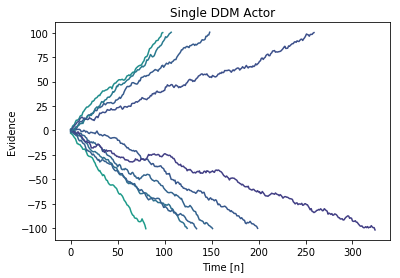

In [31]:
fig, ax = plt.subplots()
ax.set_xlabel('Time [n]')
ax.set_ylabel('Evidence')
ax.title.set_text('Single DDM Actor')

# C2 = np.abs(C2)
C2 = [abs(x) for x in output['C2']]
# for k in range(len(C2)): # [0,1,2,3,...,len(C2)]
#     C2[k] = abs(C2[k])

lines = ax.plot(output['evi'].T)
blank = [ax.lines[i].set_color(cm.viridis(color)) for i, color in enumerate(C2)]